# Data exploration

In this notebook we take the look at the data provided by the paper ["A single-cell atlas of chromatin accessibility in the human genome"](https://www.sciencedirect.com/science/article/pii/S0092867421012794?via%3Dihub#da0010).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

### 0.1 Cell_metadata
This file contains metadata for each cell/barcode. It has 6 columns:

1. `cellID`: unique ID.
2. `logUMI`: log10 number of unique fragment passing QC.
3. `tsse`: TSS enrichment
4. `tissue`: The ID of tissue sample
5. `cell type`: The name of the cell type
6. `Life stage`: Fetal or Adult

Number of cells:  1323041


,cellID,logUMI,tsse,tissue,cell type,Life stage
194897,thymus_sample_41_1+GTCTTGATGCAATACCTGCCGTTCCGT...,3.693287,12.754410,thymus_sample_41,Fetal Thymocyte,Fetal
194814,thymus_sample_41_1+GTCGTTGCTTGCGGCGCAAGATCCTTG...,3.831614,12.237762,thymus_sample_41,Fetal Thymocyte,Fetal
835221,pancreas_SM-JF1O6_1+GGTGGGTAGACGAAGGGATCAT,3.020361,21.067821,pancreas_SM-JF1O6,Pancreatic Acinar Cell,Adult
603236,intestine_sample_19_1+GTCATATTCGCGAGTTCGCCGTCG...,3.642069,12.500000,intestine_sample_19,Fetal Fibroblast (Gastrointestinal),Fetal
6723,adrenal_sample_1_1+GTTCCAACTTTGACCATCAGATGAATA...,3.490239,8.522727,adrenal_sample_1,Fetal Adrenal Cortical Cell,Fetal


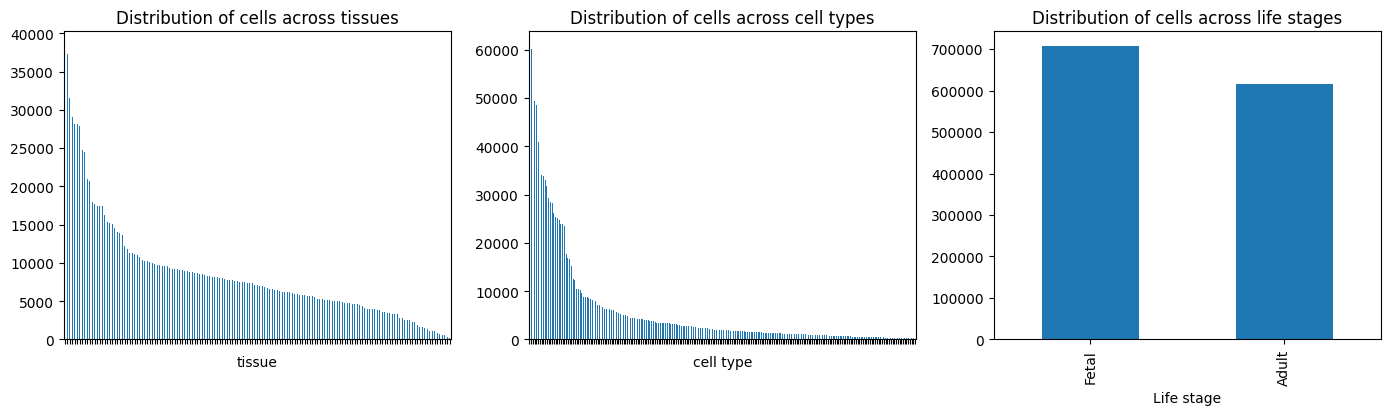

In [2]:
cell_metadata = pd.read_csv('data/Cell_metadata.tsv.gz', sep='\t', compression='gzip')
print("Number of cells: ", len(cell_metadata))
display(cell_metadata.sample(5))
fig, axs = plt.subplots(1,3, figsize=(17, 4))
plt.subplot(1, 3, 1)
plot1 = cell_metadata["tissue"].value_counts().plot.bar(title="Distribution of cells across tissues", )
no_ticks = plot1.set_xticklabels([])
plt.subplot(1, 3, 2)
plot2 = cell_metadata["cell type"].value_counts().plot.bar(title="Distribution of cells across cell types", )
no_ticks = plot2.set_xticklabels([])
plt.subplot(1, 3, 3)
plot3 = cell_metadata["Life stage"].value_counts().plot.bar(title="Distribution of cells across life stages", )


### 0.2 Cell_ontology
Matching between annotated cell type names and cell ontology terms.

In [3]:
cell_ontology = pd.read_csv('data/cell_ontology.tsv', sep='\t')
print("Number of cell types: ", len(cell_ontology)) # Both Fetal and Non-Fetal
cell_ontology.sample(5)

Number of cell types:  222


,Cell type,closest Cell Ontology term(s),Cell Ontology ID
200,Fetal Inhibitory Neuron 5,inhibitory neuron,CL:0008029
151,Fetal Photoreceptor Cell,photoreceptor cell,CL:0000210
123,Fetal Endocardial Cell,endocardial cell,CL:0002350
29,Pancreatic Alpha Cell 2,pancreatic A cell,CL:0000171
157,Fetal T Lymphocyte 2 (Cytotoxic),T cell,CL:0000084


### 0.3 cCRE_hg38
The list of 1,154,611 cCREs. There are 7 columns in this file:

1. `chromosome`: name of the chromosome.
2. `hg38_Start`: 0-based starting location of the cCRE in the genome (hg38).
3. `hg38_End`: End of the cCRE in the genome (hg38).
4. `class`: Promoter (-200 to +200 of TSS), Promoter Proximal (less) or Distal
5. `Present in fetal tissues`: if this cCRE is detected in at least one fetal tissue
6. `Present in adult tissues`: if this cCRE is detected in at least one adult tissue
7. `CRE module`: The ID of CRE module that the cCRE belongs to.

Number of cCREs:  1154611
Number of unique chromosomes : 34


,#Chromosome,hg38_Start,hg38_End,Class,Present in fetal tissues,Present in adult tissues,CRE module
683659,chr3,52265369,52265769,Distal,yes,yes,69
767037,chr4,71872218,71872618,Distal,no,yes,91
222064,chr12,22066230,22066630,Distal,yes,no,18
176200,chr11,50138133,50138533,Distal,no,yes,129
719905,chr3,146589903,146590303,Promoter Proximal,yes,yes,6


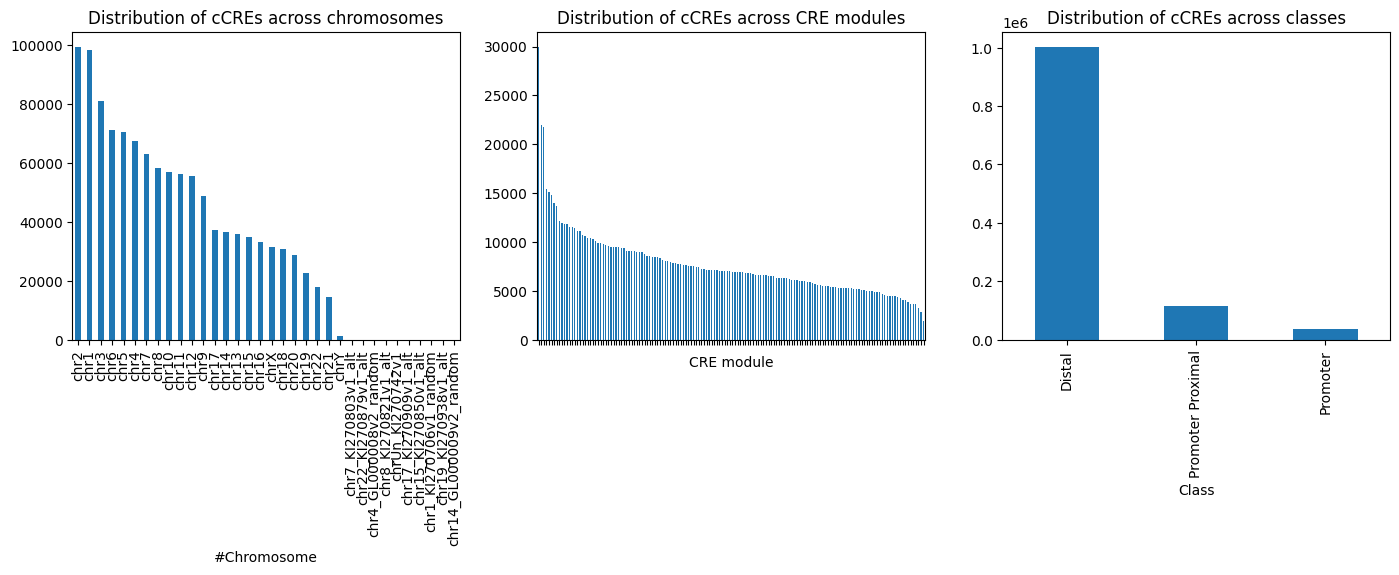

In [4]:
ccre_hg38 = pd.read_csv("data/cCRE_hg38.tsv.gz", sep='\t', compression='gzip')
print("Number of cCREs: ", len(ccre_hg38))
print("Number of unique chromosomes : {}".format(len(ccre_hg38["#Chromosome"].unique())))
display(ccre_hg38.sample(5))
fig, axs = plt.subplots(1,3, figsize=(17, 4))
plt.subplot(1, 3, 1)
plot1 = ccre_hg38["#Chromosome"].value_counts().plot.bar(title="Distribution of cCREs across chromosomes",)
plt.subplot(1, 3, 2)
plot2 = ccre_hg38["CRE module"].value_counts().plot.bar(title="Distribution of cCREs across CRE modules", )
no_ticks = plot2.set_xticklabels([])
plt.subplot(1, 3, 3)
plot3 = ccre_hg38["Class"].value_counts().plot.bar(title="Distribution of cCREs across classes", )


## 1. Cell_by_cCRE
This directory stores raw TN5 insertion counts for each cCRE in each cell, containing three files:

1. [matrix.mtx.gz](#11-matrix): count matrix in matrix market format.
2. [features.txt.gz](#12-features): column names (cCREs) of the matrix.
3. [barcodes.txt.gz](#13-rows): row names (cell barcodes) of the matrix.

### 1.1 Matrix
`matrix.mtx.gz`: count matrix in matrix market format.

In [5]:
# Goota find a way to load the matrix quickly

### 1.2 Features
`features.txt.gz`: column names (cCREs) of the matrix.

In [6]:
features = pd.read_csv("data/Cell_by_cCRE/features.txt.gz", sep='\t', compression='gzip', header=None).rename(columns={0: "cCRE"})
print("Number of features (cCREs): ", len(features))
features.sample(5)

Number of features (cCREs):  1154611


,cCRE
949816,chr12:113379289-113379689
2445,chr1:7517932-7518332
385736,chr2:10556358-10556758
217246,chr13:51684114-51684514
131616,chr11:37356965-37357365


### 1.3 Rows
`barcodes.txt.gz`: row names (cell barcodes) of the matrix.

In [7]:
barcodes = pd.read_csv("data/Cell_by_cCRE/barcodes.txt.gz", sep='\t', compression='gzip', header=None).rename(columns={0: "cell"})
print("Number of barcodes (cells): ", len(barcodes))
# I remember talking about splitting the barcodes ? 
barcodes = pd.concat([barcodes, barcodes.cell.str.split("+", expand=True).rename(columns={0: "tissue?", 1: "no idea wha this is"})], axis=1)
barcodes.sample(5)

Number of barcodes (cells):  1323041


,cell,tissue?,no idea wha this is
988848,lung_sample_47_1+ATTAGTAACGCTTCAGGCCACCAATTCCA...,lung_sample_47_1,ATTAGTAACGCTTCAGGCCACCAATTCCATTTCTATTAAT
998198,lung_sample_68_1+GGTTCGTACCCAACGGTCTTTTGGCCAGG...,lung_sample_68_1,GGTTCGTACCCAACGGTCTTTTGGCCAGGTCATCATAGCA
134413,islet_CB1_1+CTGAAGCTGGACTCCTGTAAGGAGGGTTG,islet_CB1_1,CTGAAGCTGGACTCCTGTAAGGAGGGTTG
333657,thyroid_SM-JF1O4_1+TGAGCGAGTAGAAGCACTCATT,thyroid_SM-JF1O4_1,TGAGCGAGTAGAAGCACTCATT
490627,esophagus_muscularis_SM-A8CPH_1+TTATGGATGCGGGC...,esophagus_muscularis_SM-A8CPH_1,TTATGGATGCGGGCTAGGAGAT


## 2. Cell_by_gene
This directory stores raw TN5 insertion counts for each promoter region in each cell, containing three files:

1. [matrix.mtx.gz](#21-matrix): count matrix in matrix market format.
2. [features.txt.gz](#22-features): column names (genes) of the matrix.
3. [barcodes.txt.gz](#23-rows): row names (cell barcodes) of the matrix.

### 2.1 Matrix
`matrix.mtx.gz`: count matrix in matrix market format.

In [8]:
# Goota find a way to load the matrix quickly

### 2.2 Features 
`features.txt.gz`: column names (genes) of the matrix.


In [9]:
features = pd.read_csv("data/Cell_by_gene/features.txt.gz", sep='\t', compression='gzip', header=None)
features.rename(columns={0: "gene"}, inplace=True)   
print("Number of features (genes): {}".format(len(features)))
features.sample(5)

Number of features (genes): 60583


,gene
33456,IGFL1P2
54088,SMG1P7
28667,DUTP8
14412,AC233702.3
16044,AL031778.1


### 2.3 Rows
`barcodes.txt.gz`: row names (cell barcodes) of the matrix.

In [10]:
barcodes = pd.read_csv("data/Cell_by_gene/barcodes.txt.gz", sep='\t', compression='gzip', header=None).rename(columns={0: "cell"})
print("Number of barcodes (cells) : {}".format(len(barcodes)))
barcodes.sample(5)

Number of barcodes (cells) : 1323041


,cell
1198786,adipose_omentum_SM-CSSD4_1+AACGACCAAACCTCGTCAGAAC
246772,lung_sample_38_1+CTCAAGTCTGCTAGCTTCTTGCCAGACTC...
526306,liver_sample_40_1+TTCTATAGTTTTCCATTCTTCTCTTCCA...
702056,liver_sample_35_1+TGATGCTGATATATCTTCCGTATGCTTA...
527050,liver_sample_40_1+TTGGCTACTAGGCTGGCTCTTAACTGGC...


## 3. cCRE_by_cell_type
This directory stores cCRE by cell type, containing three files:

1. [matrix.mtx.gz](#31-matrix): matrix in matrix market format, each line represents a cCRE-cell type pair. For example, "2 22" means cCRE No. 2 is accessibile in cell type No. 22.
2. [celltypes.txt.gz](#32-features): column names (cell types) of the matrix.
3. [cCREs.bed.gz](#33-rows): row names (cCREs) of the matrix.


### 3.1 Matrix

<a name="my-custom-anchor"></a>

`matrix.mtx.gz`: matrix in matrix market format, each line represents a cCRE-cell type pair. For example, "2 22" means cCRE No. 2 is accessibile in cell type No. 22.

In [11]:
# Gotta find a way to load the matrix quickly

### 3.2 Features
`celltypes.txt.gz`: column names (cell types) of the matrix.

In [12]:
celltypes = pd.read_csv("data/cCRE_by_cell_type/celltypes.txt.gz", sep='\t', compression='gzip', header=None).rename(columns={0: "cell_type"})
print("Number of features (cell types) : {}".format(len(celltypes)))
celltypes.sample(5)

Number of features (cell types) : 222


,cell_type
140,Fetal Enterocyte 2
177,Fetal Astrocyte 4
198,Fetal Excitatory Neuron 11
36,Mammary Luminal Epi 2
54,Keratinocyte 2


### 3.3 Rows
`cCREs.bed.gz`: row names (cCREs) of the matrix.

In [13]:
ccres = pd.read_csv("data/cCRE_by_cell_type/cCREs.bed.gz", sep='\t', compression='gzip', header=None).rename(columns={0: "chrom", 1: "start", 2: "end", 3: "cCRE"})
print("Number of rows (cCREs) : {}".format(len(ccres)))
ccres.sample(5)

Number of rows (cCREs) : 1154611


,chrom,start,end
629209,chr21,16294108,16294508
562147,chr2,157545336,157545736
371301,chr15,93523502,93523902
75685,chr1,200706115,200706515
192566,chr11,92416754,92417154


<a name="pookie"></a>
